#  Predict the “Energy Star score” of a building 

## Problem Description

The NYC Benchmarking Law requires owners of large buildings to annually measure their energy and water consumption in a process called benchmarking. The law standardizes this process by requiring building owners to enter their annual energy and water use in the U.S. Environmental Protection Agency's (EPA) online tool, Energy Star Portfolio Manager and use the tool to submit data. This data informs building owners about a building's energy and water consumption compared to similar buildings, and tracks progress year over year to help in energy efficiency planning

An energy efficiency score is the Energy Star Rating that a building earns using the United States Environmental Protection Agency online benchmarking tool, Energy Star Portfolio Manager, to compare building energy performance to similar buildings in similar climates.

**We would like to Build the right model to predict the “Energy Star score” of a building ‘s using the provided data.**


In [1]:
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import Imputer, MinMaxScaler
# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

## Understanding the data

In [2]:
data = pd.read_csv(r"H:\ML\Data\\Usecase1_Dataset.csv")
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


In [3]:
#Data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11746 non-null object
NYC Building Identification Number (BIN)                      11746 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     11746 non-null object
Postal Code                                          

## Atrribute information

**There are 60 attributes in 11746 case of the dataset. **

**Data set is having continuous and catagerical variables**

**Output**: Energy Star score

**Energy Star score is an ordinal variable **

## Data cleaning

In [4]:
#replace all occurences of not available with numpy Nan
data=data.replace({'Not Available':np.nan})

In [5]:
#iterate through the columns
#select the coumns should be numeric
#convert the data type to float
for col in list(data.columns):  
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):        
        data[col]=data[col].astype(float)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11735 non-null object
NYC Building Identification Number (BIN)                      11584 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     207 non-null object
Postal Code                                            

In [7]:
data.describe()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,...,Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,1.174400e+04,3741.000000,1484.000000,11746.000000,11746.000000,11746.000000,9642.000000,...,1.168100e+04,1.174600e+04,7.762000e+03,7762.000000,11583.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1.605524e+05,22778.682010,12016.825270,1948.738379,1.289971,98.762557,59.854594,...,2.076339e+03,1.673739e+05,1.591798e+04,136.172432,385.908029,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,3.095746e+05,55094.441422,27959.755486,30.576386,4.017484,7.501603,29.993586,...,5.931295e+04,3.189238e+05,1.529524e+05,1730.726938,9312.736225,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,5.400000e+01,0.000000,0.000000,1600.000000,0.000000,0.000000,1.000000,...,-2.313430e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,6.520100e+04,4000.000000,1720.750000,1927.000000,1.000000,100.000000,37.000000,...,9.480000e+01,6.699400e+04,2.595400e+03,27.150000,99.400000,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,9.132400e+04,8654.000000,5000.000000,1941.000000,1.000000,100.000000,65.000000,...,1.718000e+02,9.408000e+04,4.692500e+03,45.095000,124.900000,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1.532550e+05,20000.000000,12000.000000,1966.000000,1.000000,100.000000,85.000000,...,4.249000e+02,1.584140e+05,8.031875e+03,70.805000,162.750000,40.817623,-73.932443,9.000000,33.000000,531.500000
max,14993.000000,5.991312e+06,1.354011e+07,1.421712e+07,962428.000000,591640.000000,2019.000000,161.000000,100.000000,100.000000,...,4.764375e+06,1.421712e+07,6.594604e+06,96305.690000,912801.100000,40.912869,-73.715543,56.000000,51.000000,155101.000000


**The variables of dataset (3rd Largest Property Use Type - Gross Floor Area (ft²), Site EUI (kBtu/ft²), Weather Normalized Site EUI (kBtu/ft²), Weather Normalized Site Electricity Intensity (kWh/ft²), Weather Normalized Source EUI (kBtu/ft²) and Water Intensity (All Water Sources) (gal/ft²)) having maximum value is higher in range when compared with IQR. We can visualise using box plot for indivual variables.**

## Missing values

In [8]:
# function to calculate missing values by column
def missing_values_table(df):
    #total mising values
    mis_val=df.isnull().sum()
    #% of missing values
    mis_val_percent=100*df.isnull().sum()/len(df)
    #make a table with results
    mis_val_table=pd.concat([mis_val,mis_val_percent],axis=1)
    #rename columns
    mis_val_table_ren_columns=mis_val_table.rename(columns={0:'missing values',1:'% of total values'})
    #sort the table by % of missing descending
    mis_val_table_ren_columns=mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of total values',ascending=False).round(2)
    #print some summery
    print('Dataframe has '+ str(df.shape[1]) +" columns."
         ' there are ' + str(mis_val_table_ren_columns.shape[0])+' columns has missing values')
    return mis_val_table_ren_columns

In [9]:
missing_values_table(data)

Dataframe has 60 columns. there are 46 columns has missing values


,missing values,% of total values
Fuel Oil #1 Use (kBtu),11737,99.92
Diesel #2 Use (kBtu),11730,99.86
Address 2,11539,98.24
Fuel Oil #5 & 6 Use (kBtu),11152,94.94
District Steam Use (kBtu),10810,92.03
Fuel Oil #4 Use (kBtu),10425,88.75
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.37
3rd Largest Property Use Type,10262,87.37
Fuel Oil #2 Use (kBtu),9165,78.03
2nd Largest Property Use Type,8005,68.15


**Remove the column where data is missing more than 50% **

In [10]:
#get missing values > 50% missing
missing_df = missing_values_table(data);
missing_columns=list(missing_df[missing_df['% of total values'] > 50].index)
print('we will remove %d columns.' %len(missing_columns))

Dataframe has 60 columns. there are 46 columns has missing values
we will remove 11 columns.


In [11]:
#List of removal column
print(missing_columns)

['Fuel Oil #1 Use (kBtu)', 'Diesel #2 Use (kBtu)', 'Address 2', 'Fuel Oil #5 & 6 Use (kBtu)', 'District Steam Use (kBtu)', 'Fuel Oil #4 Use (kBtu)', '3rd Largest Property Use Type - Gross Floor Area (ft²)', '3rd Largest Property Use Type', 'Fuel Oil #2 Use (kBtu)', '2nd Largest Property Use Type', '2nd Largest Property Use - Gross Floor Area (ft²)']


In [12]:
#drop columns
data=data.drop(columns=list(missing_columns))

In [13]:
def hist_plotter(data,column,bin,xlab,ylab,title):     
     plt.hist(data[column].dropna(), bins = bin, edgecolor = 'k')
     plt.xlabel(xlab) 
     plt.ylabel(ylab)
     plt.title(title)
     plt.show()

## Exploratory data analysis

### Univariate Analysis

In [14]:
figsize(12, 8)
#Rename the score 
data = data.rename(columns = {'ENERGY STAR Score': 'score'})


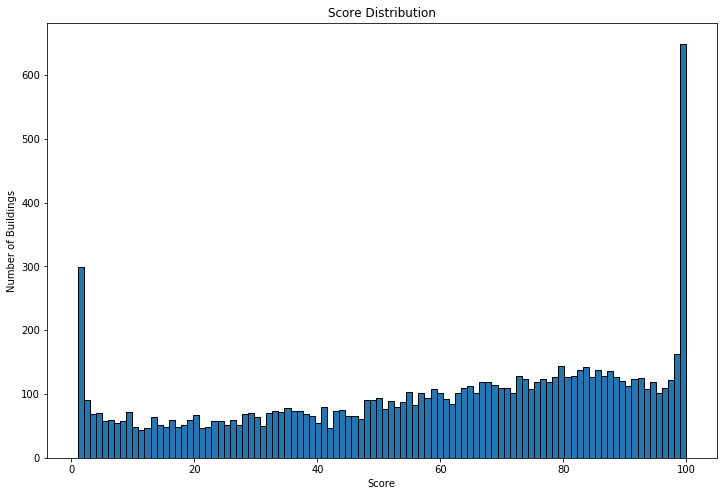

In [15]:
# Histogram of the Energy Star Score
hist_plotter(data,'score',100,'Score','Number of Buildings','Score Distribution')

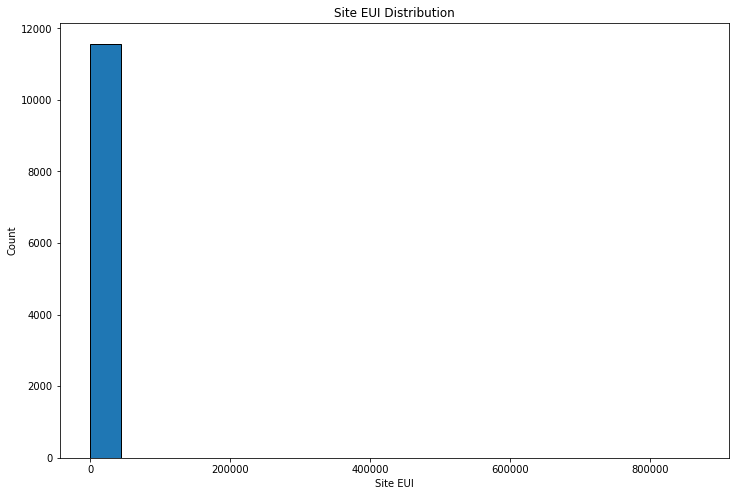

In [16]:
# Histogram of the Energy Star Score
hist_plotter(data,'Site EUI (kBtu/ft²)',20,'Site EUI','Count','Site EUI Distribution')

# Histogram Plot of Site EUI


**Site EUI feature is having an outliers. So now we are going to deal with outliers.**

In [17]:
data.shape

(11746, 49)

In [18]:
# Calculate first and third quartile
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']
# Interquartile range
iqr = third_quartile - first_quartile
# Remove outliers
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
            (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

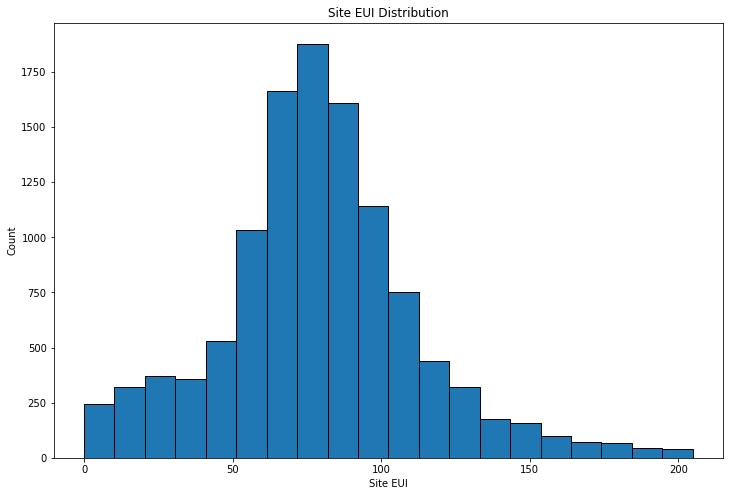

In [19]:
# Histogram of the Energy Star Score
hist_plotter(data,'Site EUI (kBtu/ft²)',20,'Site EUI','Count','Site EUI Distribution')

# Histogram Plot of Site EUI

In [20]:
# Create a list of buildings with more than 100 measurements
types = data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

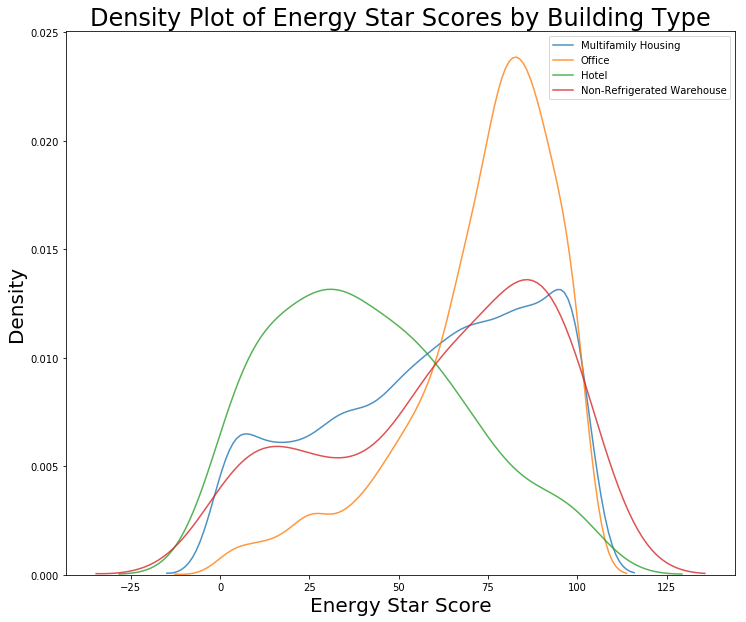

In [21]:
# Plot of distribution of scores for building categories
figsize(12, 10)

# Plot each building
for b_type in types:
    # Select the building type
    subset = data[data['Largest Property Use Type'] == b_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Building Type', size = 24);

**From this graph, we should include the property type because this information can be useful for determining the score. As building type is a categorical variable, it will have to be one-hot encoded before we can used it into a machine learning model.**


In [22]:
# Create a list of boroughs with more than 100 observations
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

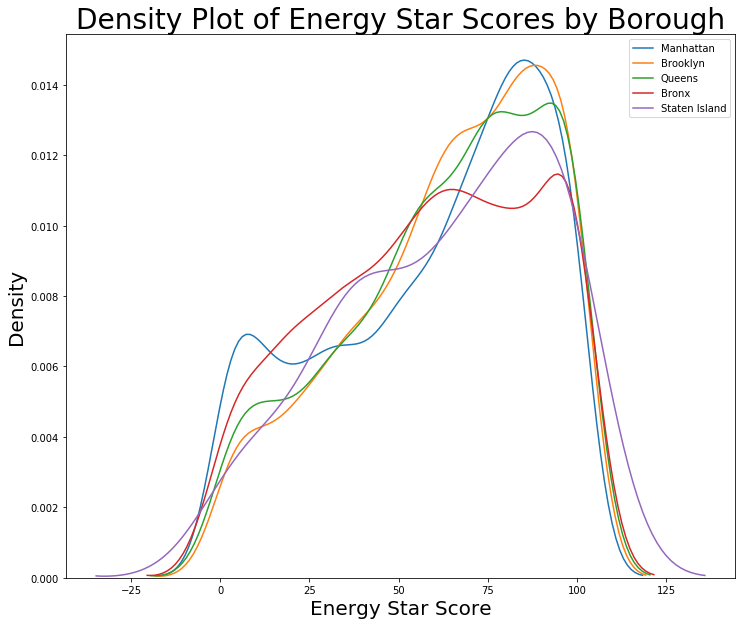

In [23]:
#Plot of distribution of scores for boroughs
figsize(12, 10)
#Plot each borough distribution of scores
for borough in boroughs:
    #Select the building type
    subset = data[data['Borough'] == borough]
    #Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = borough);
#label the plot
plt.xlabel('Energy Star Score', size = 20); 
plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Borough', size = 28);

**The borough of the building does not seem to make as significant a difference in the distribution of the score as does the building type. Nonetheless, it might make sense to include the borough as a categorical variable.**

##  Pearson correlation coefficient

In [24]:
# Find all correlations and sort 
correlations_data = data.corr()['score'].sort_values()

# Print the most negative correlations
print(correlations_data.head(10), '\n')

# Print the most positive correlations
print(correlations_data.tail(10))

Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Natural Gas Use (kBtu)                                       -0.133648
Year Built                                                   -0.121249
Name: score, dtype: float64 

Water Use (All Water Sources) (kgal)                 -0.013681
Water Intensity (All Water Sources) (gal/ft²)        -0.012148
Census Tract                                         -0.002299
DOF Gross Floor Area                                  0.013001
Property

#### The most negative correlations with the score are Site EUI (kBtu/ft²) and Weather Normalized Site EUI (kBtu/ft²)

#### Intuitively, these correlations then make sense: as the EUI increases (the amount of energy used), the Energy Star Score tends to decrease.

#### There are no strong positive linear relationships

#### In the following code, we take log and square root transformations of the numerical variables, one-hot encode the two selected categorical variables (building type and borough), calculate the correlations between all of the features and the score, and display the top 10 most positive and top 10 most negative correlations. 

In [25]:

# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with square root and log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without an energy star score
features = features.dropna(subset = ['score'])

# Find correlations with the score 
correlations = features.corr()['score'].dropna().sort_values()

In [26]:
# Display most negative correlations
correlations.head(10)

Site EUI (kBtu/ft²)                             -0.723864
Weather Normalized Site EUI (kBtu/ft²)          -0.713993
sqrt_Site EUI (kBtu/ft²)                        -0.699817
sqrt_Weather Normalized Site EUI (kBtu/ft²)     -0.689019
sqrt_Weather Normalized Source EUI (kBtu/ft²)   -0.671044
sqrt_Source EUI (kBtu/ft²)                      -0.669396
Weather Normalized Source EUI (kBtu/ft²)        -0.645542
Source EUI (kBtu/ft²)                           -0.641037
log_Source EUI (kBtu/ft²)                       -0.622892
log_Weather Normalized Source EUI (kBtu/ft²)    -0.620329
Name: score, dtype: float64

In [27]:
# Display most negative correlations
correlations.tail(10)

Largest Property Use Type_Hospital (General Medical & Surgical)    0.048410
Borough_Brooklyn                                                   0.050486
log_Community Board                                                0.055495
Community Board                                                    0.056612
sqrt_Community Board                                               0.058029
sqrt_Council District                                              0.060623
log_Council District                                               0.061101
Council District                                                   0.061639
Largest Property Use Type_Office                                   0.158484
score                                                              1.000000
Name: score, dtype: float64

## bivariate plot

Text(0.5,1,'Energy Star Score vs Site EUI')

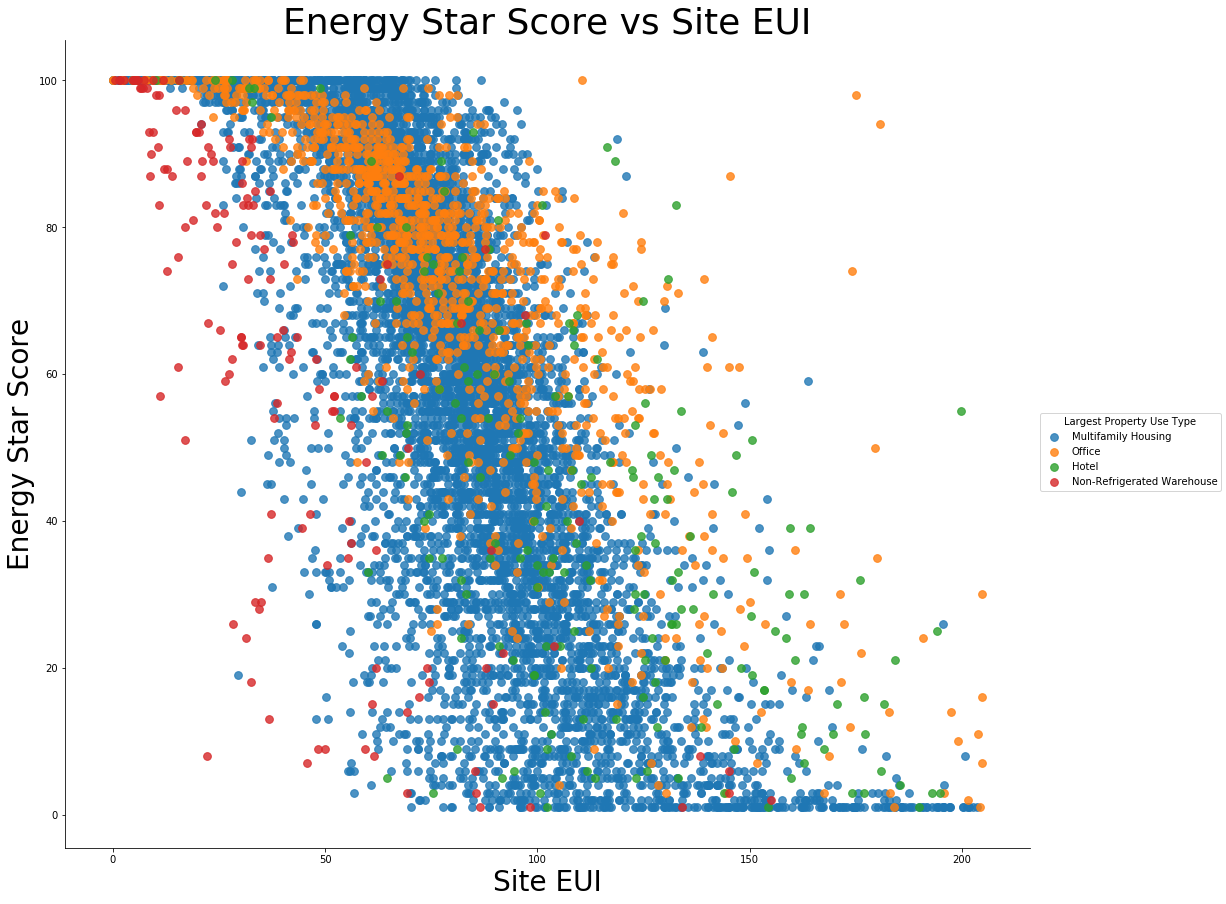

In [28]:
figsize(12, 10)
# Extract the building types
features['Largest Property Use Type'] = data.dropna(subset = ['score'])['Largest Property Use Type']

features = features[features['Largest Property Use Type'].isin(types)]

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot('Site EUI (kBtu/ft²)', 'score', 
          hue = 'Largest Property Use Type', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2)
# Plot labeling
plt.xlabel("Site EUI", size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36)

Text(0.5,1.02,'Pairs Plot of Energy Data')

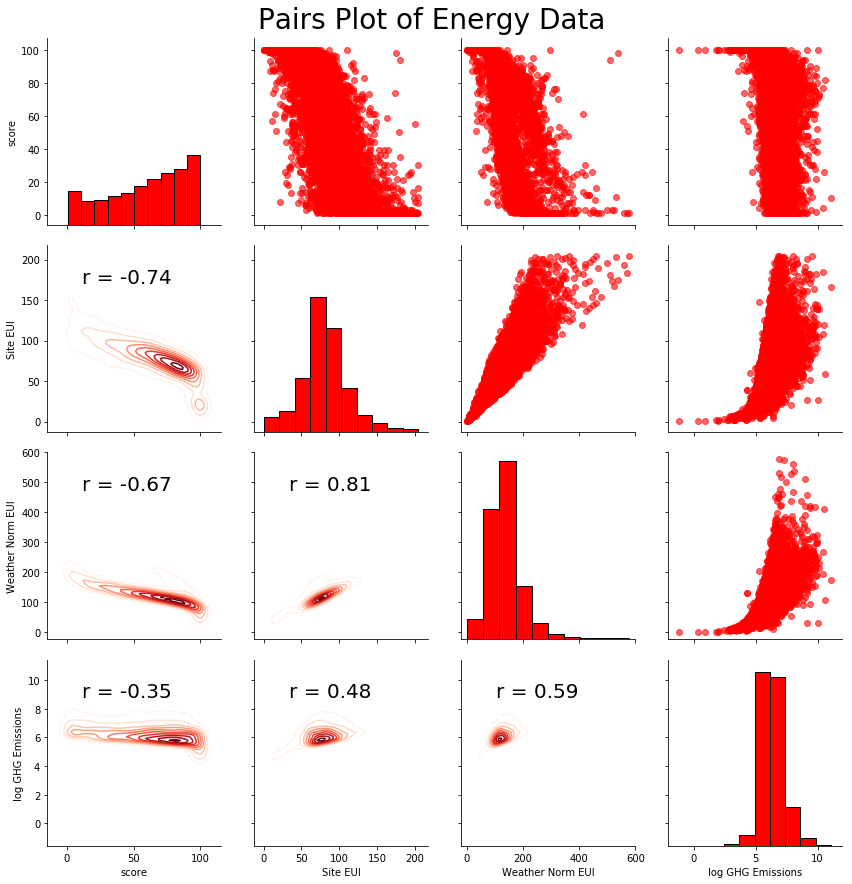

In [29]:
#Extract the columns to  plot
plot_data = features[['score', 'Site EUI (kBtu/ft²)', 
                      'Weather Normalized Source EUI (kBtu/ft²)', 
                      'log_Total GHG Emissions (Metric Tons CO2e)']]

#Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

#Rename columns 
plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI', 
                                        'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
                                        'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})

#Drop na values
plot_data = plot_data.dropna()

#Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

#Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

#Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

#Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

#Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

#Title for entire plot
plt.suptitle('Pairs Plot of Energy Data', size = 28, y = 1.02)

In [30]:

# Copy the original data
features = data.copy()

# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape

(11319, 110)

At this point, we have 11319 observations (buildings) with 109 different features (one column is the score). Not all of these features are likely to be important for predicting the score, and several of these features are also redundant because they are highly correlated. We will deal with this second issue below.

## Remove Collinear Feature

Remove features that have a correlation coefficient above a certain threshold with each other 

The following code removes the collinear features based on a threshold we select for the correlation coefficients by removing one of the two features that are compared. It also prints the correlations that it removes so we can see the effect of adjusting the threshold. We will use a threshold of **0.7** which removes one of a pair of features if the correlation coefficient between the features exceeds this value.

In [31]:
def collinearity(x, threshold):
    '''
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    # Dont want to remove correlations between Energy Star Score
    y = x['score']
    x = x.drop(columns = ['score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
    x['score'] = y
    return x

In [32]:
#Remove the collinear features above a specified correlation coefficient
features = collinearity(features, 0.7)

In [33]:
# Remove any columns with all na values
features  = features.dropna(axis=1, how = 'all')
features.shape

(11319, 74)

#### Our final dataset now has 74 features (one of the columns is the target). This is still quite a few, but mostly it is because we have one-hot encoded the categorical variables.

### Additional Feature Selection
There are plenty of more methods for feature selection. Some popular methods include principal components analysis (PCA) which transforms the features into a reduced number of dimensions that preserve the greatest variance, or independent components analysis (ICA) which aims to find the independent sources in a set of features.

### Splitting into Training & Test sets
In machine learning, we always need to separate our features into two sets:

Training set which we provide to our model during training along with the answers so it can learn a mapping between the features and the target.

Testing set which we use to evaluate the mapping learned by the model. The model has never seen the answers on the testing set, but instead, must make predictions using only the features. As we know the true answers for the test set, we can then compare the test predictions to the true test targets to get an estimate of how well our model will perform when deployed in the real world.

For our problem, we will first extract all the buildings without an Energy Star Score (we don't know the true answer for these buildings so they will not be helpful for training or testing). Then, we will split the buildings with an Energy Star Score into a testing set of 20% of the buildings, and a training set of 80% of the buildings.

In [34]:
features.columns

Index(['Order', 'Property Id', 'DOF Gross Floor Area', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Natural Gas Use (kBtu)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)',
       'Weather Normalized Site Electricity (kWh)',
       'Water Intensity (All Water Sources) (gal/ft²)', 'Latitude',
       'Longitude', 'Community Board', 'Census Tract',
       'log_DOF Gross Floor Area',
       'log_Largest Property Use Type - Gross Floor Area (ft²)',
       'log_Direct GHG Emissions (Metric Tons CO2e)',
       'log_Water Intensity (All Water Sources) (gal/ft²)', 'Borough_Bronx',
       'Borough_Queens', 'Borough_Staten Island',
       'Largest Property Use Type_Adult Education',
       'Largest Property Use Type_Automobile Dealership',


In [35]:

# Extract the buildings with no score and the buildings with a score
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]

print(no_score.shape)
print(score.shape)

(1858, 74)
(9461, 74)


In [36]:
score.head()

,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Natural Gas Use (kBtu),...,Largest Property Use Type_Retail Store,Largest Property Use Type_Self-Storage Facility,Largest Property Use Type_Senior Care Community,Largest Property Use Type_Social/Meeting Hall,Largest Property Use Type_Strip Mall,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility,score
12,15,2637863,NaN,1903,2,100,32.0,7.5,0.0,2047200.0,...,0,0,0,0,0,0,0,0,0,93.0
18,21,2780056,NaN,1939,2,100,76.2,3.5,0.0,880200.0,...,0,0,0,0,0,0,0,0,0,72.0
19,22,4988574,179130.0,1939,1,100,75.7,4.0,0.0,553439.4,...,0,0,0,0,0,0,0,0,0,67.0
20,23,4988569,102150.0,1939,1,100,77.1,2.6,0.0,326760.6,...,0,0,0,0,0,0,0,0,0,80.0
21,24,2806486,NaN,1911,2,100,68.0,6.1,0.5,8786386.9,...,0,0,0,0,0,0,0,0,0,100.0


In [37]:
#features = score.drop(columns='score')
features.head()

,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Natural Gas Use (kBtu),...,Largest Property Use Type_Retail Store,Largest Property Use Type_Self-Storage Facility,Largest Property Use Type_Senior Care Community,Largest Property Use Type_Social/Meeting Hall,Largest Property Use Type_Strip Mall,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility,score
12,15,2637863,NaN,1903,2,100,32.0,7.5,0.0,2047200.0,...,0,0,0,0,0,0,0,0,0,93.0
17,20,2777309,NaN,1907,7,100,120.0,8.7,0.9,52441239.4,...,0,0,0,0,0,0,0,0,0,NaN
18,21,2780056,NaN,1939,2,100,76.2,3.5,0.0,880200.0,...,0,0,0,0,0,0,0,0,0,72.0
19,22,4988574,179130.0,1939,1,100,75.7,4.0,0.0,553439.4,...,0,0,0,0,0,0,0,0,0,67.0
20,23,4988569,102150.0,1939,1,100,77.1,2.6,0.0,326760.6,...,0,0,0,0,0,0,0,0,0,80.0


In [38]:

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# Separate out the features and targets
features = score.drop(columns='score')
targets = pd.DataFrame(score['score'])

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 80% training and 20% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(7568, 73)
(1893, 73)
(7568, 1)
(1893, 1)


In [40]:
targets.head()

,score
12,93.0
18,72.0
19,67.0
20,80.0
21,100.0


# Classification

### Metric : Mean Absolute Error
In this case, because we doing regression, the mean absolute error is an appropriate metric. This is also interpretable because it represents the average amount our estimate if off by in the same units as the target value.

In [43]:
# Imputing missing values and scaling values
from sklearn.preprocessing import Imputer, MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [50]:

# Create an imputer object with a median filling strategy
imputer = Imputer(strategy='median')

# Train on the training features
imputer.fit(X)

# Transform both training data and testing data
X = imputer.transform(X)
X_test = imputer.transform(X_test)

In [51]:
X_test

array([[  10220., 5729364.,  123910., ...,       0.,       0.,       0.],
       [  12891., 4954012.,  266316., ...,       0.,       0.,       0.],
       [   7434., 3533538.,   54365., ...,       0.,       0.,       0.],
       ...,
       [   9353., 4928934.,   50622., ...,       0.,       0.,       0.],
       [  11774., 2267983.,  151720., ...,       0.,       0.,       0.],
       [  10758., 2969027.,  104640., ...,       0.,       0.,       0.]])

In [52]:
X

array([[4.334000e+03, 2.669751e+06, 1.040000e+05, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [8.700000e+02, 2.679476e+06, 1.360700e+05, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [6.345000e+03, 2.787415e+06, 1.071060e+05, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [8.343000e+03, 3.119428e+06, 1.123390e+05, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.574000e+03, 5.039588e+06, 1.002440e+05, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.139800e+04, 4.406995e+06, 5.270000e+04, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]])

In [54]:
# Make sure all values are finite
print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


## Model prediction¶

In [55]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X)

# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [58]:

# Convert y to one-dimensional array (vector)
y = np.array(y).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

In [59]:

# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [60]:

lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 13.3557


In [61]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Regression Performance on the test set: MAE = 10.6238


In [62]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

Random Forest Regression Performance on the test set: MAE = 9.9688


In [63]:

knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 13.4118


In [ ]:
Conclusion = pd.DataFrame({'Models': ["SVC","Random Forest","KNN"],
                           'Accuracies': [accuracy_score(Y_test,pred_svcn),accuracy_score(Y_test,pred_rfcn),accuracy_score(Y_test,pred_knnn)]})

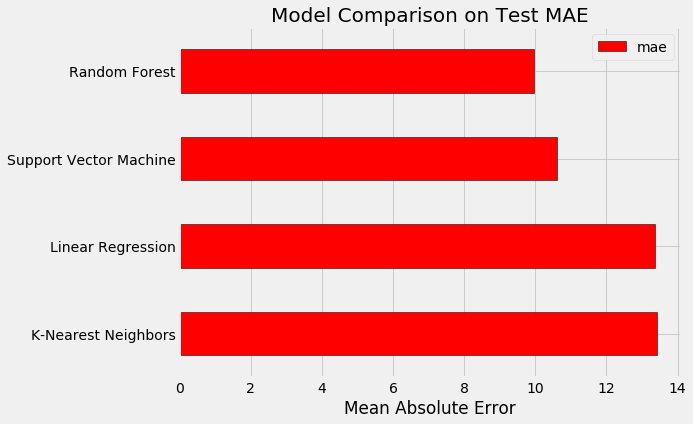

In [64]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest','K-Nearest Neighbors'],
                                 'mae': [lr_mae, svm_mae, random_forest_mae, knn_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

### Remarks
Depending on the run the random forest performs the best followed by the SVM .

**next we shall divide Energy star score in to 4 classes and will create a new column called Score_category. This column will contain the values of A,B,C and D which includes.**
- A class as Energy star score >85 (Quality=1,2,3,4)
- B class as Energy star score >= 71 and <= 85(Quality=5,6,7)
- C class as Energy star score >= 51 and <= 70
- D class as Energy star score <= 50

In [65]:
targets_classify=targets.copy()

In [66]:
#Create an empty list called Reviews
reviews = []
for i in targets_classify['score']:
    if i >= 0 and i <= 50:
        reviews.append('D')
    elif i >= 51 and i <= 70:
        reviews.append('C')
    elif i >= 71 and i <= 85:
        reviews.append('B')
    elif i >= 86:
        reviews.append('A')
targets_classify['Score_category'] = reviews

In [68]:
targets_classify = targets_classify.drop(columns='score')

### Training and Cross validation data set

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, targets_classify, test_size = 0.2,random_state=0)

### Features impute and scaling

In [71]:
# Create an imputer object with a median filling strategy
imputer = Imputer(strategy='median')

# Train on the training features
imputer.fit(X_train)

# Transform both training data and testing data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [72]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(7568, 73)
(1893, 73)


## SVM (With reduce class and Without PCA)

In [73]:
from sklearn.svm import SVC
svcn = SVC()
svcn.fit(X_train,Y_train)
pred_svcn=svcn.predict(X_test)
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(Y_test,pred_svcn))

             precision    recall  f1-score   support

          A       0.78      0.75      0.76       474
          B       0.44      0.47      0.46       363
          C       0.48      0.45      0.47       392
          D       0.83      0.84      0.84       664

avg / total       0.67      0.67      0.67      1893



## Random forest(With reduce class and Without PCA)

In [74]:
from sklearn.ensemble import RandomForestClassifier
rfcn = RandomForestClassifier(n_estimators=100)
rfcn.fit(X_train, Y_train)
pred_rfcn = rfcn.predict(X_test)
print(classification_report(Y_test, pred_rfcn))

             precision    recall  f1-score   support

          A       0.76      0.82      0.79       474
          B       0.50      0.46      0.48       363
          C       0.51      0.42      0.46       392
          D       0.80      0.86      0.83       664

avg / total       0.67      0.68      0.67      1893



## K Nearest Neighbour(With reduce class and Without PCA)

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knnn = KNeighborsClassifier()
knnn.fit(X_train,Y_train)
pred_knnn=knnn.predict(X_test)
print(classification_report(Y_test, pred_knnn))

             precision    recall  f1-score   support

          A       0.60      0.64      0.62       474
          B       0.32      0.44      0.37       363
          C       0.36      0.30      0.32       392
          D       0.78      0.66      0.72       664

avg / total       0.56      0.54      0.54      1893



In [76]:
Conclusion = pd.DataFrame({'Models': ["SVC","Random Forest","KNN"],
                           'Accuracies': [accuracy_score(Y_test,pred_svcn),accuracy_score(Y_test,pred_rfcn),accuracy_score(Y_test,pred_knnn)]})
Conclusion

,Accuracies,Models
0,0.668780,SVC
1,0.683571,Random Forest
2,0.538299,KNN


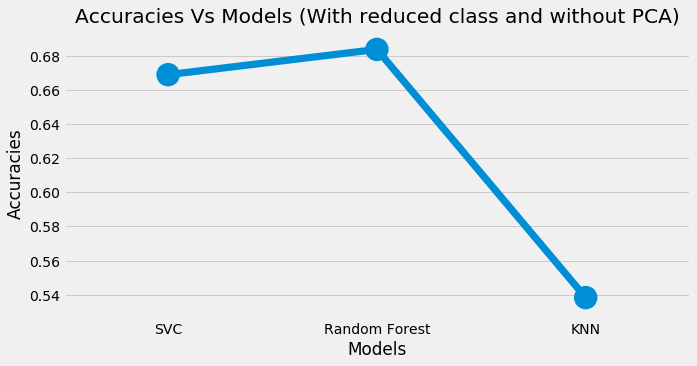

In [78]:
plt.figure(figsize=(10,5))
sns.pointplot(Conclusion['Models'],Conclusion['Accuracies'])
plt.title('Accuracies Vs Models (With reduced class and without PCA)')
plt.show()

### Remarks

**We can observe that, Random forest has higher accuracy score followed by Support vector classifier.**

**The accuracy score obtained by Random forest model is higher compared to SVC and KNN model**

Below We can used a PCA and with new features we can check the model accuracy

## Principle component analysis¶

In [79]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [80]:
print(explained_variance)
print(pca.explained_variance_)

[1.14565730e-01 7.41132401e-02 5.56036227e-02 4.32019905e-02
 3.52932918e-02 3.46483973e-02 3.19567325e-02 2.92516738e-02
 2.86049468e-02 2.60224277e-02 2.45893378e-02 2.36873309e-02
 2.30710250e-02 2.29452270e-02 2.29211465e-02 2.28401346e-02
 2.28181288e-02 2.27899540e-02 2.27656118e-02 2.27309264e-02
 2.26770343e-02 2.24950898e-02 2.23994769e-02 2.22582500e-02
 2.21914912e-02 2.14667628e-02 2.05901695e-02 1.85561300e-02
 1.76030648e-02 1.71412566e-02 1.69240045e-02 1.43657677e-02
 1.12810248e-02 1.04162338e-02 8.07295335e-03 7.76192159e-03
 7.54249419e-03 4.95167803e-03 2.94872821e-03 2.35232050e-03
 1.19679138e-03 3.19133420e-04 6.73458451e-05 2.25941065e-32
 2.17461875e-32 1.68942210e-32 5.75560785e-33 4.73329349e-33
 2.17657031e-33 1.73289220e-33 8.80109670e-34 3.91382972e-34
 3.85569247e-34 3.85569247e-34 3.85569247e-34 3.85569247e-34
 3.85569247e-34 3.85569247e-34 3.85569247e-34 3.85569247e-34
 3.85569247e-34 3.85569247e-34 3.85569247e-34 3.85569247e-34
 3.85569247e-34 3.855692

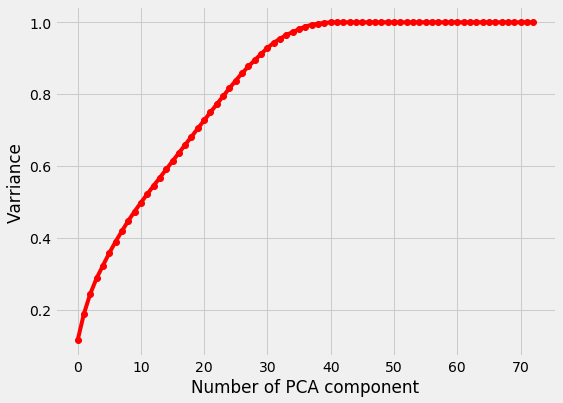

In [81]:
##plot the graph to find the principal components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of PCA component')
plt.ylabel('Varriance')
plt.show()

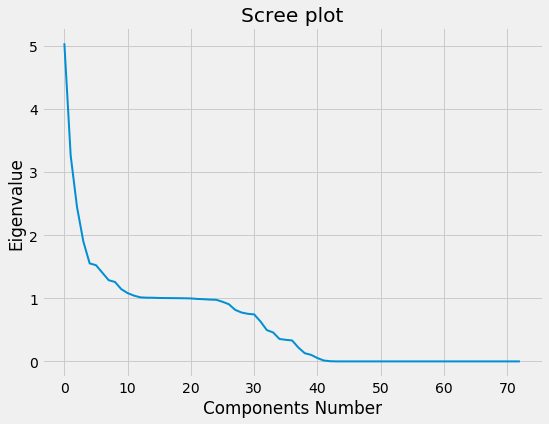

In [82]:
plt.plot(pca.explained_variance_, linewidth=2)
plt.xlabel('Components Number')
plt.ylabel('Eigenvalue')
plt.title('Scree plot')
plt.show()

**A Scree plot of eigenvalues of the unrotated factors displaying an ‘elbow’ of the plot. This point of the curve represents the threshold chosen for retention of the initial factors extracted from the observed variables and which maximize the variance accounted for.Thirty factors cumulatively accounted for more than 90% of the total variance with final communality estimate So We can select first thirty (30) PCA component for our analysis to keep maximum variance.**

In [83]:
pca_new = PCA(n_components = 30)
X_train = pca_new.fit_transform(X_train)
X_test = pca_new.transform(X_test)
explained_variance = pca_new.explained_variance_ratio_
print(explained_variance)
print(X_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(Y_train.shape)

[0.11456573 0.07411324 0.05560362 0.04320199 0.03529329 0.0346484
 0.03195673 0.02925167 0.02860495 0.02602243 0.02458934 0.02368733
 0.02307102 0.02294523 0.02292115 0.02284013 0.02281813 0.02278995
 0.02276561 0.02273093 0.02267703 0.02249509 0.02239948 0.02225825
 0.02219149 0.02146676 0.02059017 0.01855613 0.01760306 0.01714126]
(7568, 30)
(1893, 30)
(1893, 1)
(7568, 1)


## SVM (Using PCA and with reduce class)
### (Selection of number of degree of the polynomial kernel function of SVM model)

In [84]:
degree_range=range(1,10)
degree_scores=[]
for d in degree_range:
    svc = SVC(degree=d)
    svc.fit(X_train, Y_train)
    pred_svc = svc.predict(X_test)
    degree_scores.append(accuracy_score(Y_test, pred_svc))
print(degree_scores)

[0.6386687797147385, 0.6386687797147385, 0.6386687797147385, 0.6386687797147385, 0.6386687797147385, 0.6386687797147385, 0.6386687797147385, 0.6386687797147385, 0.6386687797147385]


**Significant results in accuracy score has not been observed while changing in degree of the kernel function, So default value (3) has been consider for SVM model**

In [85]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,Y_train)
pred_svc=svc.predict(X_test)
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(Y_test,pred_svc))

             precision    recall  f1-score   support

          A       0.73      0.71      0.72       474
          B       0.41      0.42      0.42       363
          C       0.46      0.43      0.44       392
          D       0.80      0.83      0.81       664

avg / total       0.64      0.64      0.64      1893



## Random Forest (Using PCA and with reduce class)

### (Selection of number of trees for optimization of random forest model)

In [86]:
n_range=range(1,100)
n_scores=[]
for n in n_range:
    rfc = RandomForestClassifier(n_estimators=n)
    rfc.fit(X_train, Y_train)
    pred_rfc = rfc.predict(X_test)
    n_scores.append(accuracy_score(Y_test, pred_rfc))
print(n_scores)

[0.46328578975171686, 0.48019017432646594, 0.5007923930269413, 0.5393555203380876, 0.5478077126254622, 0.5515055467511886, 0.5589012150026413, 0.5800316957210776, 0.5747490755414686, 0.5868991019545695, 0.5673534072900158, 0.572107765451664, 0.5699947173798204, 0.5879556259904913, 0.601162176439514, 0.5847860538827259, 0.5990491283676703, 0.5969360802958267, 0.5868991019545695, 0.6032752245113576, 0.6001056524035921, 0.6048600105652404, 0.601162176439514, 0.5884838880084522, 0.5985208663497095, 0.5985208663497095, 0.595879556259905, 0.606973058637084, 0.5985208663497095, 0.6075013206550449, 0.6111991547807712, 0.6122556788166931, 0.612783940834654, 0.6148969889064976, 0.6111991547807712, 0.6016904384574749, 0.6059165346011621, 0.6101426307448494, 0.6106708927628104, 0.5990491283676703, 0.6038034865293186, 0.6016904384574749, 0.6085578446909667, 0.6048600105652404, 0.5985208663497095, 0.6085578446909667, 0.6075013206550449, 0.5985208663497095, 0.5969360802958267, 0.6096143687268886, 0.6

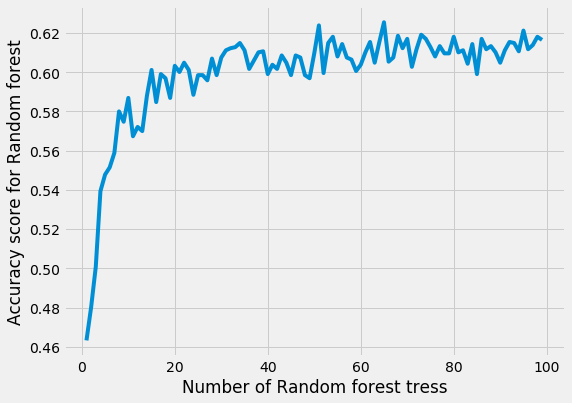

In [87]:
# Plot value of Number of random forest tress verses the cross validation accuracy
plt.plot(n_range,n_scores)
plt.xlabel('Number of Random forest tress')
plt.ylabel('Accuracy score for Random forest')
plt.show()

From above graph, to get accuracy more than 63%, we can select 93 trees for random forest model

In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=93)
rfc.fit(X_train, Y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(Y_test, pred_rfc))

             precision    recall  f1-score   support

          A       0.68      0.73      0.70       474
          B       0.41      0.38      0.39       363
          C       0.45      0.35      0.40       392
          D       0.73      0.82      0.77       664

avg / total       0.60      0.61      0.60      1893



## K-Nearest Neighbors (Using PCA and with reduce class)
### Optimization of the number of neighbours(K)

In [89]:
k_range=range(1,25)
k_scores=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    pred_knn = knn.predict(X_test)
    k_scores.append(accuracy_score(Y_test, pred_knn))
print(k_scores)

[0.5282620179609087, 0.4918119387216059, 0.5335446381405177, 0.5330163761225568, 0.5509772847332277, 0.5478077126254622, 0.5441098784997359, 0.5567881669307977, 0.5499207606973059, 0.5573164289487585, 0.5583729529846804, 0.5615425250924458, 0.5657686212361331, 0.5710512414157423, 0.561014263074485, 0.5678816693079768, 0.5699947173798204, 0.5657686212361331, 0.5715795034337031, 0.5625990491283677, 0.5599577390385632, 0.5631273111463285, 0.5636555731642895, 0.5636555731642895]


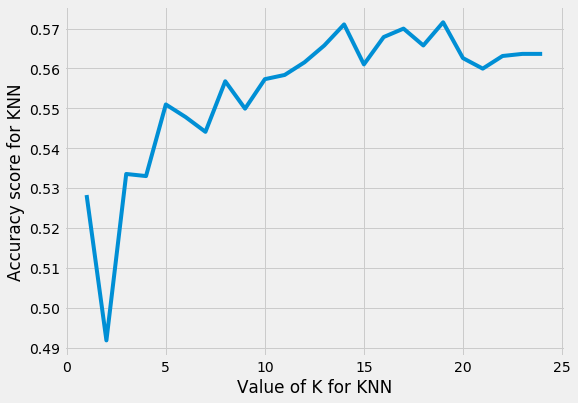

In [90]:
# Plot value of K verses the cross validation accuracy
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy score for KNN')
plt.show()

#### From above graph, we can select k=17 for maximizing the accuracy

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,Y_train)
pred_knn=knn.predict(X_test)
print(classification_report(Y_test, pred_knn))

             precision    recall  f1-score   support

          A       0.65      0.66      0.65       474
          B       0.38      0.47      0.42       363
          C       0.38      0.31      0.34       392
          D       0.73      0.72      0.73       664

avg / total       0.57      0.57      0.57      1893



In [92]:
conclusion = pd.DataFrame({'models': ["SVC","Random Forest","KNN"],
                           'accuracies': [accuracy_score(Y_test,pred_svc),accuracy_score(Y_test,pred_rfc),accuracy_score(Y_test,pred_knn)]})
conclusion

,accuracies,models
0,0.638669,SVC
1,0.614369,Random Forest
2,0.569995,KNN


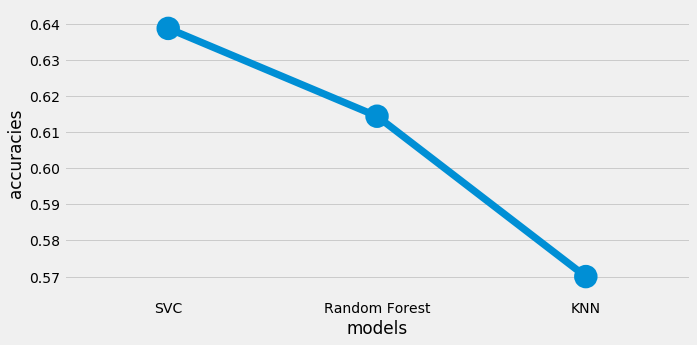

In [93]:
plt.figure(figsize=(10,5))
sns.pointplot(conclusion['models'],conclusion['accuracies'])
plt.show()

### Remark:
From above, we have observed that accuracy score has been slightly incrased with PCA model for KNN algorithm with 30 PCA coponents. All the three models has been tuned, trained using train data set and tested on test data set. Support vector classifier model has higher accuracy score when compared with Random forest and KNN. 


### Conclusion
In this notebook, we carried out the first beow steps of a machine learning problem:

1.Cleaned and formatted the raw data

2.Performed an exploratory data analysis

3.Developed a set of features to train our model using feature engineering and feature selection

4.Prediction of energy score has been done considering regression and classification problem (Class A, B, C and D)

**For regression, we have seen Random forest has better accuracy compared to other three model (Linera regression, SVM and KNN)**

**For classification, we have seen Random forest has better accuracy compared to other two model (SVM and KNN) without considering the PCA**

**For classification, we have seen SVC has better accuracy compared to other two model (Random forest and KNN) with the PCA**
